# **BlinkIT Grocery Data Analysis**

### **import all libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **import data**
**using pandas import blinkit grocery data**

In [6]:
data=pd.read_excel("BlinkIT Grocery Data.xlsx")
df=pd.DataFrame(data)
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


### **Data Cleaning**

**step-1** : check any null or duplicate values is there or not

In [9]:
duplicate_data=df.duplicated().sum()
null_data=df.isnull().sum()
display('Duplicate_Data',duplicate_data)
display("Null_Data",null_data)

'Duplicate_Data'

0

'Null_Data'

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


***So there is no duplicate values**                                
***And there are Null values in Item Weight column we can fill it with mean value**

In [12]:
df.fillna(df['Item Weight'].mean(),inplace=True)
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.100000,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.800000,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.850000,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.150000,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.600000,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,12.857645,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.857645,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,12.857645,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,12.857645,97.8752,4.0


**we filled null values with mean**

**Now we are going to replace lowfat,LF with Low Fat and then reg with Regular**

In [15]:
df.replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.100000,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.800000,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.850000,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.150000,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.600000,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,12.857645,164.5526,4.0
8519,Low Fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.857645,241.6828,4.0
8520,Low Fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,12.857645,86.6198,4.0
8521,Regular,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,12.857645,97.8752,4.0


**we replaced the  lowfat,LF with Low Fat and then reg with Regular**

### cleaning process is completed

## Exploratory Data Analysis

### **Statistics**

In [20]:
display('Statical Data')
df.describe()

'Statical Data'

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.226124,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,9.310000,93.826500,4.000000
50%,2016.000000,0.053931,12.857645,143.012800,4.000000
75%,2018.000000,0.094585,16.000000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


### **Now Visualize the Data with different Patterns**

**First we check the trend in Sales Over Year**

### **Use Line Chart For the Trend Analysis**

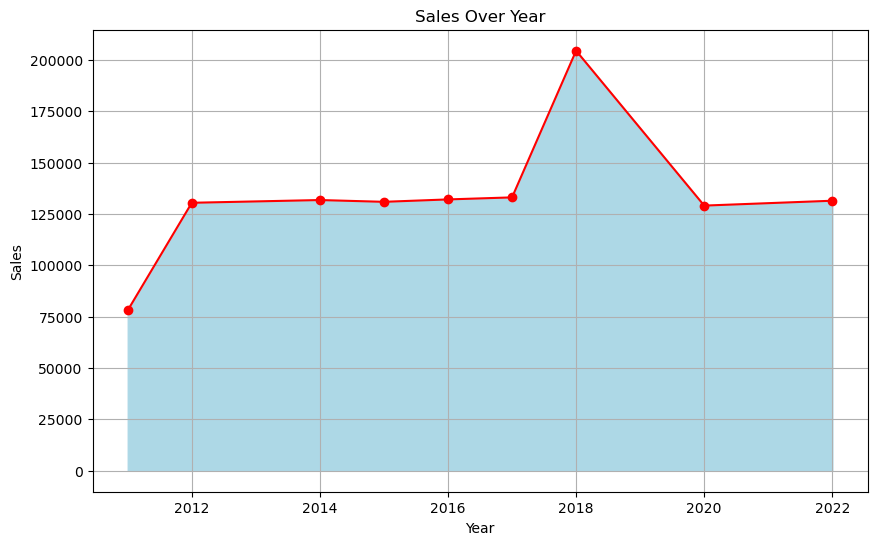

In [24]:
trend=df.groupby("Outlet Establishment Year")["Sales"].sum().reset_index()
plt.figure(figsize=(10,6))
plt.fill_between(trend["Outlet Establishment Year"],trend["Sales"],color='lightblue')
plt.plot(trend["Outlet Establishment Year"],trend["Sales"],color='r',marker='o')
plt.title('Sales Over Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

### **Use Bar chart to compare item types and sales**

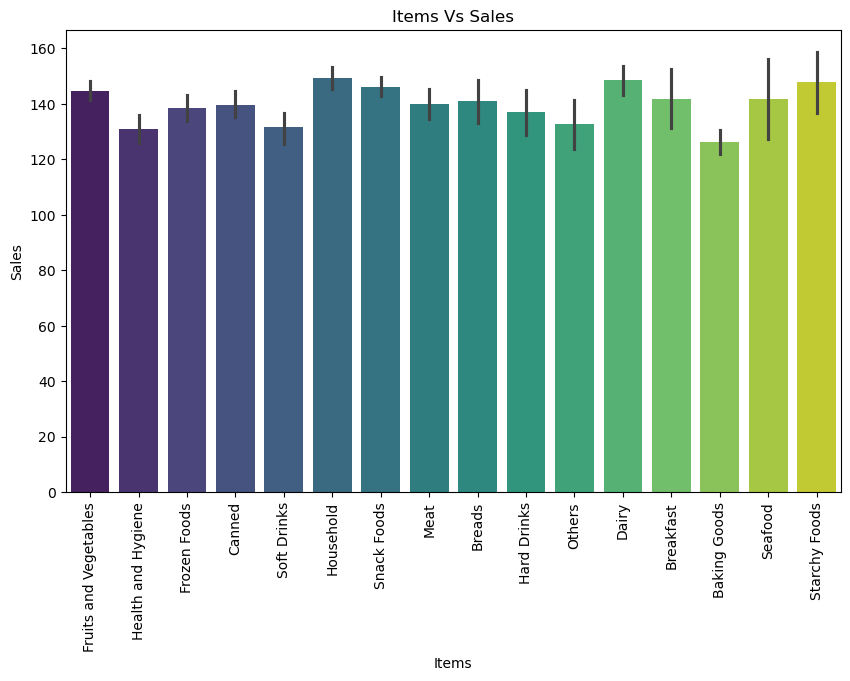

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x="Item Type",y="Sales",data=df,hue='Item Type',palette='viridis')
plt.title('Items Vs Sales')
plt.xlabel('Items')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.grid(False)
plt.show()

### **Use Pie chart to proportion change in Sales By item fat content**

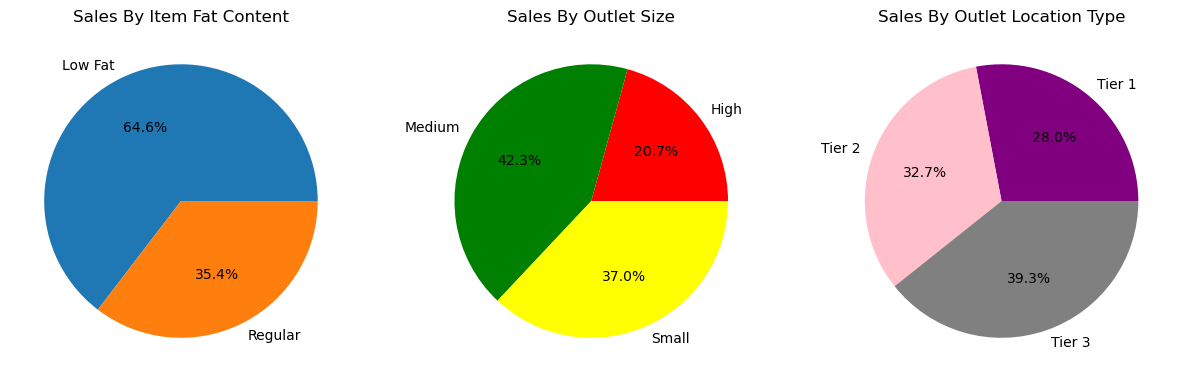

In [75]:
pie=df.groupby('Item Fat Content')['Sales'].sum().reset_index()
pie1=df.groupby('Outlet Size')['Sales'].sum().reset_index()
pie2=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
fig,axes=plt.subplots(1,3,figsize=(15,10))
axes[0].pie(pie['Sales'],labels=pie['Item Fat Content'],autopct='%1.1f%%')
axes[0].set_title('Sales By Item Fat Content')
axes[1].pie(pie1['Sales'],labels=pie1['Outlet Size'],autopct='%1.1f%%',colors=['red','green','yellow'])
axes[1].set_title('Sales By Outlet Size')
axes[2].pie(pie2['Sales'],labels=pie2['Outlet Location Type'],autopct='%1.1f%%',colors=['purple','pink','gray'])
axes[2].set_title('Sales By Outlet Location Type')
plt.show()

### **Column Chart to compare Outlet location type,Outlet Type and Sales**

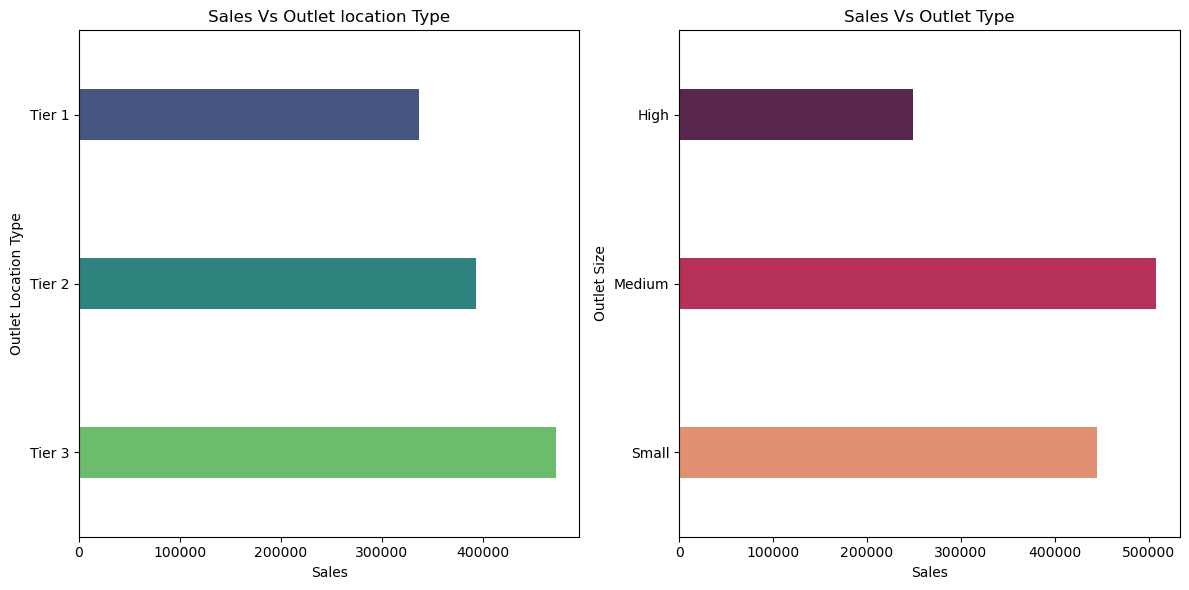

In [89]:
c1=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
c2=df.groupby('Outlet Size')['Sales'].sum().reset_index()
fig,axes=plt.subplots(1,2,figsize=(12,6))
sns.barplot(x='Sales',y='Outlet Location Type',data=c1,palette='viridis',hue='Outlet Location Type',width=0.3,ax=axes[0])
axes[0].set_title('Sales Vs Outlet location Type')
sns.barplot(x='Sales',y='Outlet Size',data=c2,palette='rocket',hue='Outlet Size',width=0.3,ax=axes[1])
axes[1].set_title('Sales Vs Outlet Type')
plt.tight_layout()
plt.show()

### **Clustered Bar Chart**

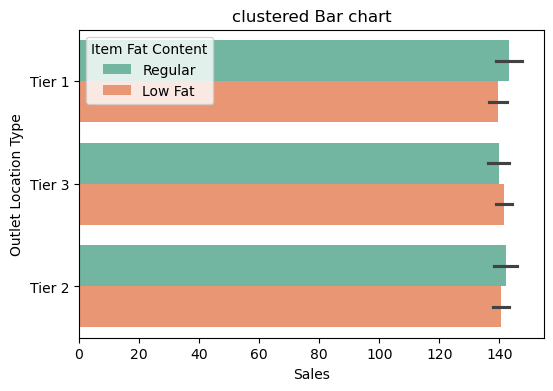

In [105]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sales',y='Outlet Location Type',hue='Item Fat Content',data=df,palette='Set2')
plt.title("clustered Bar chart")
plt.show()

### **histogrm plot to repressent sales count**

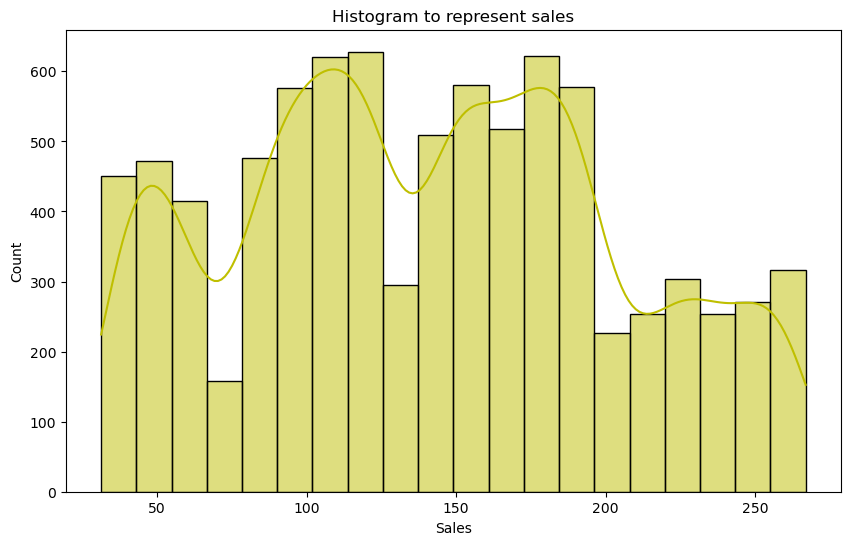

In [126]:
plt.figure(figsize=(10,6))
sns.histplot(x='Sales',bins=20,kde=True,data=df,color='y')
plt.title('Histogram to represent sales')
plt.show()